Shape: (918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngi

C:\Users\Elvis\AppData\Local\Temp\ipykernel_16780\2400355710.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cholesterol"].fillna(df["Cholesterol"].median(), inplace=True)
C:\Users\Elvis\AppData\Local\Temp\ipykernel_16780\2400355710.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="HeartDisease", data=df, palette="Set2")


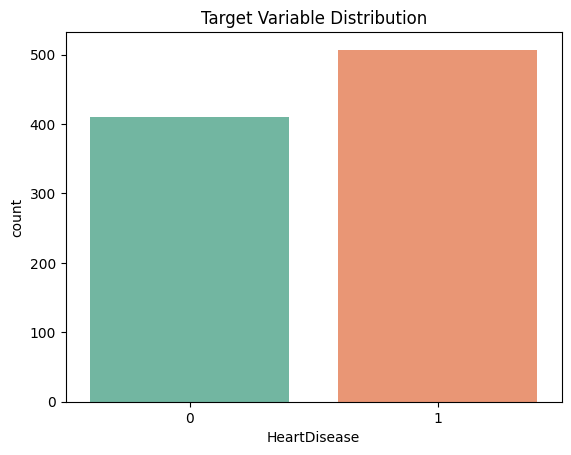

Age          mean0=50.55, mean1=55.90, p=3.1608e-18
RestingBP    mean0=130.18, mean1=134.45, p=3.4279e-04
Cholesterol  mean0=238.68, mean1=246.87, p=2.0912e-02
MaxHR        mean0=148.15, mean1=127.60, p=8.0441e-37
Oldpeak      mean0=0.41, mean1=1.27, p=3.0043e-37


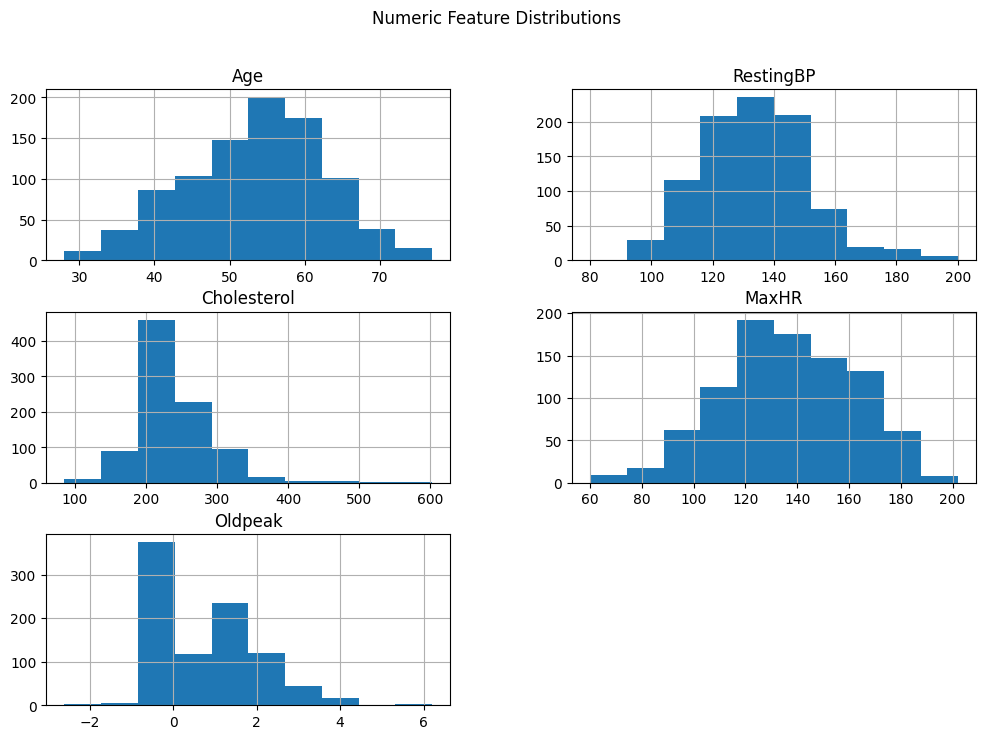

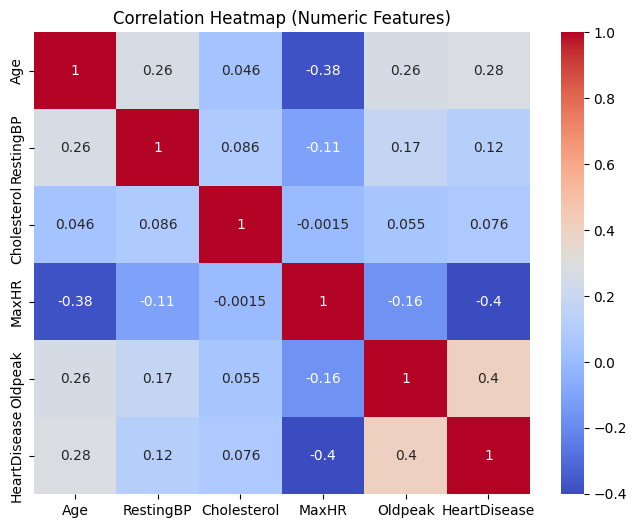

Sex          chi2=83.87, p=5.2810e-20


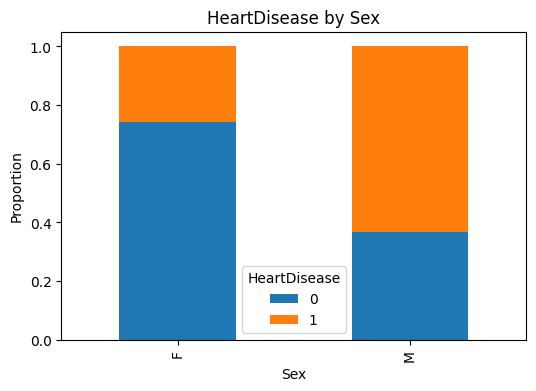

ChestPainType chi2=268.90, p=5.3488e-58


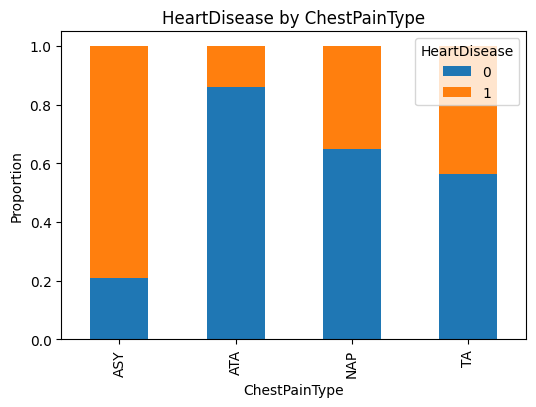

FastingBS    chi2=64.59, p=9.2159e-16


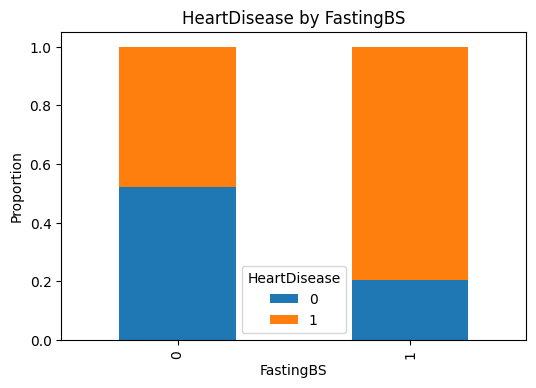

RestingECG   chi2=11.07, p=3.9471e-03


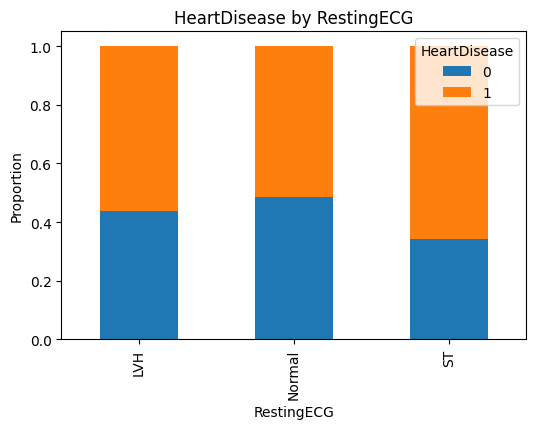

ExerciseAngina chi2=223.11, p=1.8995e-50


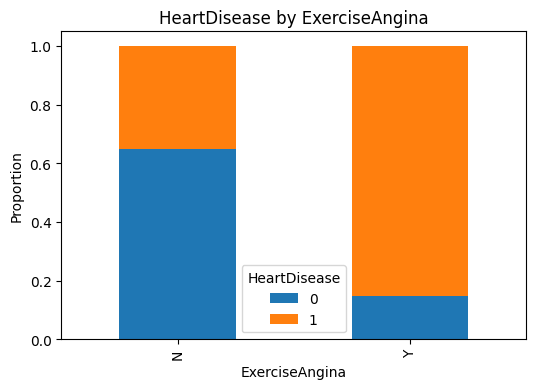

ST_Slope     chi2=355.16, p=7.5669e-78


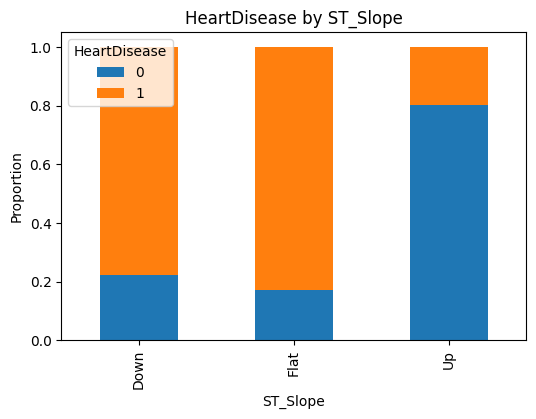


HeartDisease by AgeGroup:
 HeartDisease         0         1
AgeGroup                        
20-39         0.655914  0.344086
40-49         0.582960  0.417040
50-59         0.418421  0.581579
60-69         0.263959  0.736041
70+           0.333333  0.666667


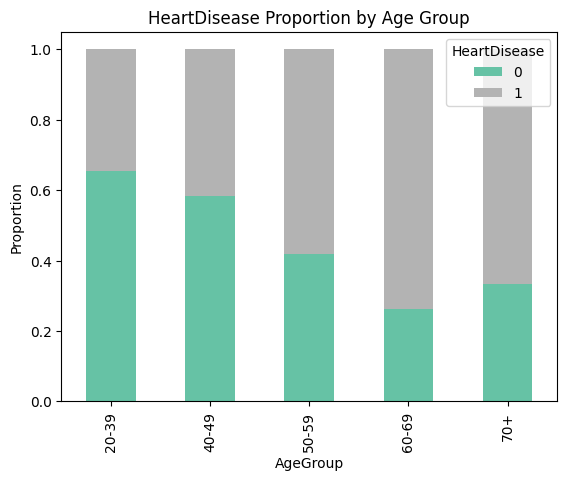


Encoded dataset shape: (917, 16)
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140        289.0          0    172      0.0             0   
1   49        160        180.0          0    156      1.0             1   
2   37        130        283.0          0     98      0.0             0   
3   48        138        214.0          0    108      1.5             1   
4   54        150        195.0          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False              False               True             False   
2   True               True              False             False   
3  False              False              False             False   
4   True              False               True             False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          Fals

In [1]:
# ===============================
# 1. Imports & Setup
# ===============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

# Display settings
pd.set_option("display.max_columns", None)

# ===============================
# 2. Load Data
# ===============================
df = pd.read_csv("heart.csv")
print("Shape:", df.shape)
print(df.head())

# ===============================
# 3. Basic Checks
# ===============================
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

print("\nSummary statistics:")
print(df.describe(include="all"))

# ===============================
# 4. Data Cleaning
# ===============================
# Handle impossible values
print("\nInvalid RestingBP values:", (df["RestingBP"]==0).sum())
print("Invalid Cholesterol values:", (df["Cholesterol"]==0).sum())

# Drop 1 invalid RestingBP row
df = df[df["RestingBP"] > 0]

# Impute Cholesterol zeros with median
df["Cholesterol"] = df["Cholesterol"].replace(0, np.nan)
df["Cholesterol"].fillna(df["Cholesterol"].median(), inplace=True)

print("\nPost-cleaning shape:", df.shape)

# ===============================
# 5. Target Balance
# ===============================
target_dist = df["HeartDisease"].value_counts(normalize=True)
print("\nHeartDisease distribution:\n", target_dist)

sns.countplot(x="HeartDisease", data=df, palette="Set2")
plt.title("Target Variable Distribution")
plt.show()

# ===============================
# 6. Numeric Feature Analysis
# ===============================
num_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

for col in num_cols:
    group0 = df[df["HeartDisease"]==0][col]
    group1 = df[df["HeartDisease"]==1][col]
    stat, p = ttest_ind(group0, group1)
    print(f"{col:12s} mean0={group0.mean():.2f}, mean1={group1.mean():.2f}, p={p:.4e}")

# Histograms
df[num_cols].hist(figsize=(12,8))
plt.suptitle("Numeric Feature Distributions")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols + ["HeartDisease"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# ===============================
# 7. Categorical Feature Analysis
# ===============================
cat_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]

for col in cat_cols:
    ct = pd.crosstab(df[col], df["HeartDisease"])
    chi2, p, dof, exp = chi2_contingency(ct)
    print(f"{col:12s} chi2={chi2:.2f}, p={p:.4e}")
    ct_norm = ct.div(ct.sum(axis=1), axis=0)  # normalized rates
    ct_norm.plot(kind="bar", stacked=True, figsize=(6,4))
    plt.title(f"HeartDisease by {col}")
    plt.ylabel("Proportion")
    plt.show()

# ===============================
# 8. Combined Feature Insights
# ===============================
# Example: Age group vs HeartDisease
df["AgeGroup"] = pd.cut(df["Age"], bins=[20,40,50,60,70,80], labels=["20-39","40-49","50-59","60-69","70+"])
age_ct = pd.crosstab(df["AgeGroup"], df["HeartDisease"], normalize="index")
print("\nHeartDisease by AgeGroup:\n", age_ct)

age_ct.plot(kind="bar", stacked=True, colormap="Set2")
plt.title("HeartDisease Proportion by Age Group")
plt.ylabel("Proportion")
plt.show()

# ===============================
# 9. Ready-to-Model Dataset
# ===============================
# Encode categorical features
df_encoded = pd.get_dummies(df.drop(columns=["AgeGroup"]), drop_first=True)
print("\nEncoded dataset shape:", df_encoded.shape)
print(df_encoded.head())



Logistic Regression Performance:
Accuracy: 0.875
ROC-AUC: 0.9377092300334768
Confusion Matrix:
 [[70 12]
 [11 91]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184


Top Logistic Regression Coefficients:
               Feature  Coefficient
8   ChestPainType_NAP    -0.690795
7   ChestPainType_ATA    -0.686108
14        ST_Slope_Up    -0.674902
6               Sex_M     0.592430
3           FastingBS     0.538030
13      ST_Slope_Flat     0.498271
12   ExerciseAngina_Y     0.403281
9    ChestPainType_TA    -0.379613
5             Oldpeak     0.313280
4               MaxHR    -0.243761

Random Forest Performance:
Accuracy: 0.8804347826086957
ROC-AUC: 0.9292802486848398
Confusion Matrix:
 [[7

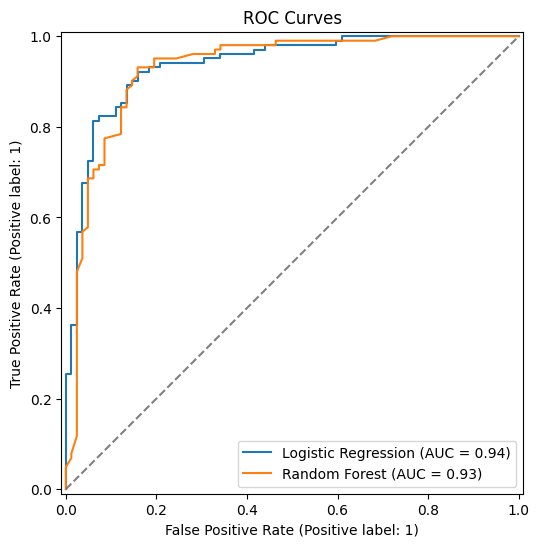

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_theme(style="whitegrid")

# =====================================================
# Figure 1: Target distribution
# =====================================================
plt.figure(figsize=(6,4))
sns.countplot(x="HeartDisease", data=df, palette="Set2")
plt.title("Heart Disease Distribution")
plt.xlabel("HeartDisease (0 = Healthy, 1 = Diseased)")
plt.ylabel("Count")
plt.show()

# =====================================================
# Figure 2: Age distribution by outcome
# =====================================================
plt.figure(figsize=(6,4))
sns.boxplot(x="HeartDisease", y="Age", data=df, palette="Set2")
plt.title("Age by Heart Disease Status")
plt.xlabel("HeartDisease (0 = Healthy, 1 = Diseased)")
plt.ylabel("Age (years)")
plt.show()

# =====================================================
# Figure 3: MaxHR and Oldpeak by outcome
# =====================================================
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(x="HeartDisease", y="MaxHR", data=df, palette="Set2", ax=axes[0])
axes[0].set_title("MaxHR by Heart Disease")
axes[0].set_xlabel("HeartDisease")
axes[0].set_ylabel("MaxHR")

sns.boxplot(x="HeartDisease", y="Oldpeak", data=df, palette="Set2", ax=axes[1])
axes[1].set_title("Oldpeak by Heart Disease")
axes[1].set_xlabel("HeartDisease")
axes[1].set_ylabel("Oldpeak")

plt.tight_layout()
plt.show()

# =====================================================
# Figure 4: Cholesterol distribution by outcome
# =====================================================
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Cholesterol", hue="HeartDisease",
             kde=True, bins=30, element="step", palette="Set2")
plt.title("Cholesterol by Heart Disease Status")
plt.xlabel("Cholesterol (mg/dl)")
plt.ylabel("Frequency")
plt.show()

# =====================================================
# Figure 5: Chest Pain Type vs outcome
# =====================================================
ct = pd.crosstab(df["ChestPainType"], df["HeartDisease"], normalize="index")
ct.plot(kind="bar", stacked=True, figsize=(7,5), colormap="Set2")
plt.title("Proportion of Heart Disease by Chest Pain Type")
plt.ylabel("Proportion")
plt.legend(title="HeartDisease", loc="upper right")
plt.show()

# =====================================================
# Figure 6: ST Slope vs outcome
# =====================================================
ct = pd.crosstab(df["ST_Slope"], df["HeartDisease"], normalize="index")
ct.plot(kind="bar", stacked=True, figsize=(7,5), colormap="Set2")
plt.title("Proportion of Heart Disease by ST Slope")
plt.ylabel("Proportion")
plt.legend(title="HeartDisease", loc="upper right")
plt.show()

# =====================================================
# Figure 7: Correlation heatmap (numeric features)
# =====================================================
plt.figure(figsize=(8,6))
num_cols = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak","HeartDisease"]
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()
